In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Reading Dataset
dataset = pd.read_csv('adult.csv')
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#data types of columns
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
#List of columns present in Dataset
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#Shape of Dataset
dataset.shape

(32561, 15)

In [0]:
#Renaming few columns
dataset.rename(columns = {'education.num':'education_num', 'marital.status':'marital_status', 'capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'}, inplace = True) 

In [8]:
#Checking the change
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [0]:
#Replacing "?" with NAN
dataset['workclass'].replace('?', np.nan, inplace= True)
dataset['occupation'].replace('?', np.nan, inplace= True)
dataset['native_country'].replace('?', np.nan, inplace= True)

In [10]:
#A detailed description of the datset
dataset.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [11]:
#Number of null values in the dataset column wise
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

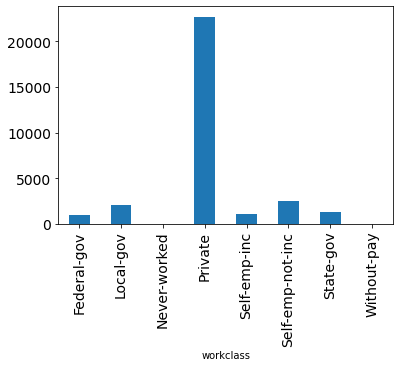

In [12]:
#Grouping Workclass
dataset.groupby(['workclass']).size().plot(kind="bar",fontsize=14)

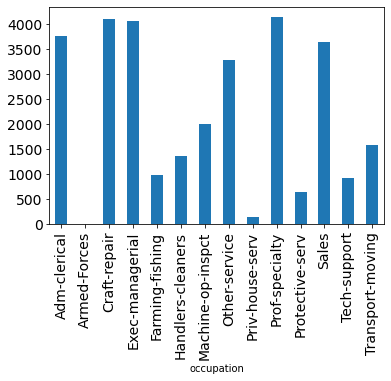

In [13]:
#Grouping Occupation
dataset.groupby(['occupation']).size().plot(kind="bar",fontsize=14)

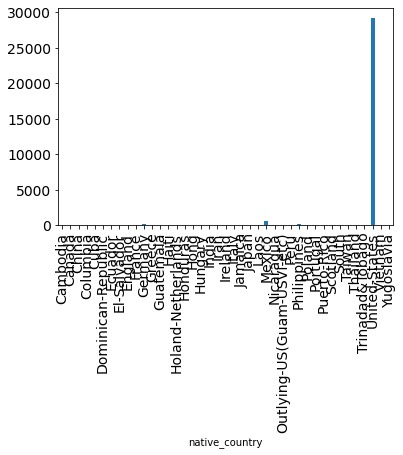

In [14]:
#Grouping Native Country
dataset.groupby(['native_country']).size().plot(kind="bar",fontsize=14)

In [19]:
#Droping null values in occupation column
data1 = dataset.dropna(subset=['occupation'])
data1.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64

In [20]:
#Shape of dataset after droping null values
data1.shape

(30718, 15)

In [0]:
#Imputing null values with Mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
imp_data = pd.DataFrame(imputer.fit_transform(data1))
imp_data.columns= data1.columns
imp_data.index = data1.index

In [22]:
#Checking for null values
imp_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [23]:
#Confirming the Categorical Features
categorical_feature_mask = imp_data.dtypes==object
categorical_feature_mask


age               True
workclass         True
fnlwgt            True
education         True
education_num     True
marital_status    True
occupation        True
relationship      True
race              True
sex               True
capital_gain      True
capital_loss      True
hours_per_week    True
native_country    True
income            True
dtype: bool

In [0]:
##Label encoding the all the categorical features

data = imp_data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['income','workclass','education','marital_status','occupation','relationship','race','sex','native_country']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [25]:
#Number of categories in dataset
data.nunique()

age                  72
workclass             7
fnlwgt            20495
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
income                2
dtype: int64

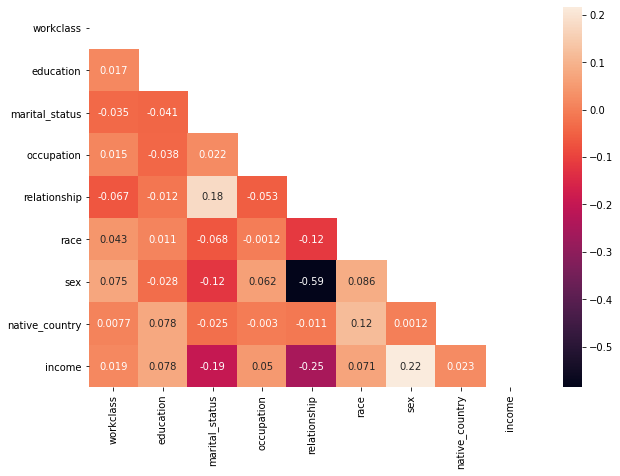

In [26]:
#Finding Correlation between variables
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,mask = mask)

In [0]:
#Slicing dataset into Independent(X) and Target(y) varibles
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [0]:
#Dividing dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Training the Logistic Regression on Train data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Predicting the Test data
y_pred = classifier.predict(X_test)

In [0]:
#Evaluation of Prediction on test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6477  405]
 [1271 1063]]


In [0]:
#Accuracy Metric
from sklearn.metrics import accuracy_score as accuracy_score
acs = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
acs*100

81.81423611111111

In [0]:
#A detailed Classification Report
from sklearn.metrics import classification_report
c_r = classification_report(y_test,y_pred)
print(c_r)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6882
           1       0.72      0.46      0.56      2334

    accuracy                           0.82      9216
   macro avg       0.78      0.70      0.72      9216
weighted avg       0.81      0.82      0.80      9216



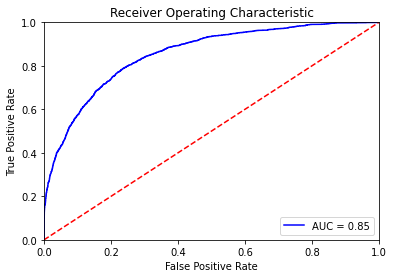

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#Plotting ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()